In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/drive/MyDrive/VQA-Final/runs/detect/train/weights/best.pt")  # load a partially trained model


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/VQA-Final/runs/detect/train/weights/best.pt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Validation Metrics

In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Load the YOLO model
model = YOLO('/content/drive/MyDrive/VQA-Final/runs-final/detect/train/weights/best.pt')

# Define the path to your test folder
test_folder = '/content/drive/MyDrive/VQA-Final/dataset-part-A/dataset-part-A/train/images'

# List all image files in the test folder
image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random subset of 5 images
random_images = random.sample(image_files, min(5, len(image_files)))

# Run batched inference on the selected images
results = model(random_images)

# Process results list
for i, result in enumerate(results):
    # Save result image to disk
    result_image_path = os.path.join(test_folder, f"result_{i}.jpg")
    result.save(filename=result_image_path)

    # Load and display the result image
    result_image = Image.open(result_image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(result_image)
    plt.title(f"Result for {os.path.basename(random_images[i])}")
    plt.axis('off')
    plt.show()

    print(f"Processed {random_images[i]} and saved result to {result_image_path}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Load the YOLO model
model = YOLO('/content/drive/MyDrive/VQA-Final/runs/detect/train/weights/last.pt')
model.val()

In [ ]:
!yolo export model="/content/drive/MyDrive/runs-mid-term/detect/yolov8n_culture/weights/best.pt" format=onnx  # export custom trained model

In [ ]:
# Import the necessary libraries
from ultralytics import YOLO

# Load the YOLOv8 model (replace with the path to your trained model)
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

# Define the path to your video file
video_file = ''

# Run inference on the video file
results = model.predict(source=video_file, save=True)


In [ ]:
# Validate on training data
# model.val()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# results generation

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
csv_path = '/content/drive/MyDrive/VQA-Final/runs-final/detect/train/results.csv'
df = pd.read_csv(csv_path, delimiter=',')  # Adjust delimiter if needed

In [ ]:
df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.5602,3.3246,1.7945,0.66445,0.52917,0.62145,0.29590,1.7248,2.4145,2.1716,0.000208,0.000208,0.000208
1,2,1.4954,2.2411,1.6892,0.76569,0.70935,0.75039,0.36643,1.6692,1.9070,2.0063,0.000412,0.000412,0.000412
2,3,1.4898,1.9231,1.6739,0.68491,0.67156,0.72107,0.35978,1.7001,1.6859,2.0366,0.000612,0.000612,0.000612
3,4,1.4534,1.6974,1.6444,0.76276,0.73859,0.79223,0.41954,1.5619,1.4711,1.9145,0.000606,0.000606,0.000606
4,5,1.4274,1.4954,1.6080,0.78125,0.78248,0.83366,0.45640,1.5160,1.2144,1.8527,0.000600,0.000600,0.000600


In [ ]:
df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
# Strip any leading/trailing whitespace characters from column names
df.columns = df.columns.str.strip()
df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

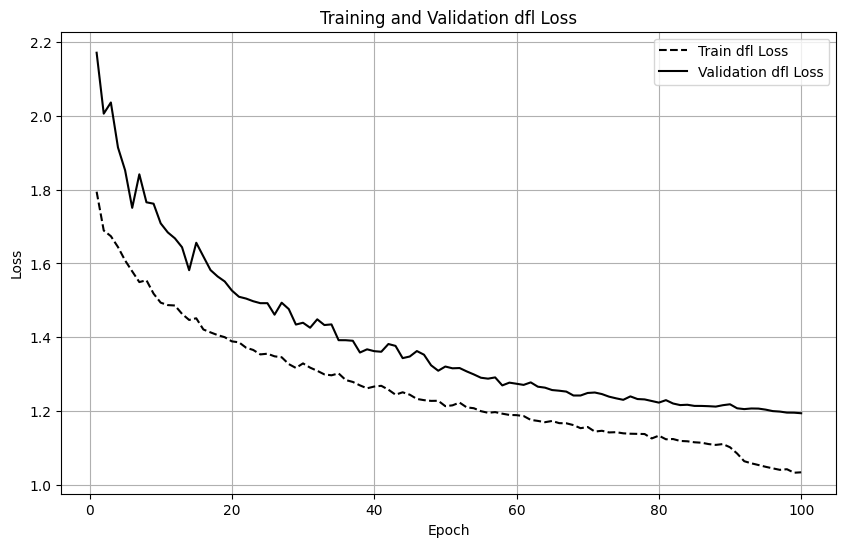

In [ ]:
# Plot the training and validation classification loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/dfl_loss'], 'k--', label='Train dfl Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], 'k-',label='Validation dfl Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation dfl Loss')
plt.legend()
plt.grid(True)

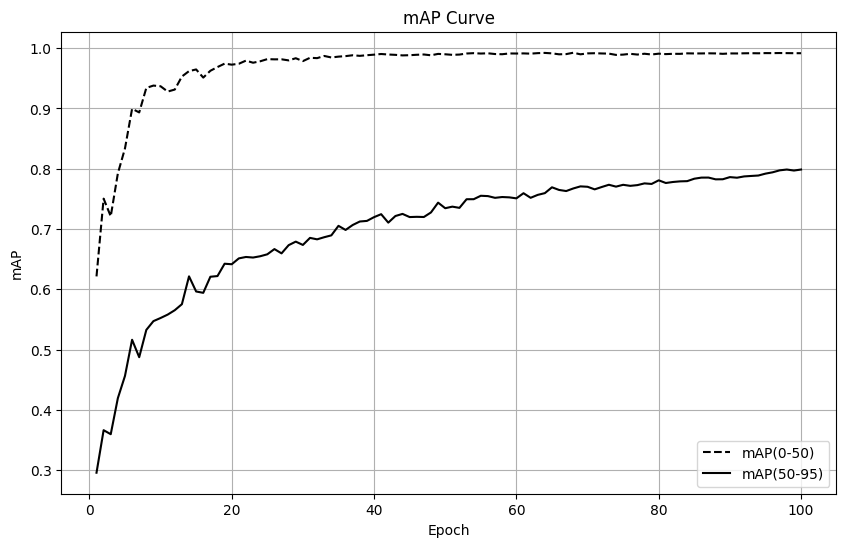

In [ ]:
# Plot the training and validation classification loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], 'k--', label='mAP(0-50)')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], 'k-',label='mAP(50-95)')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP Curve')
plt.legend()
plt.grid(True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import uniform_filter1d


# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], 'k-', label='Precision')
# plt.plot(df['epoch'], recall_, 'k-', label='Recall')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Find maximum values
max_precision = df['metrics/precision(B)'].max()
max_recall = df['metrics/recall(B)'].max()
max_map50 = df['metrics/mAP50(B)'].max()
max_map90 = df['metrics/mAP50-95(B)'].max()

# Print the results
print(f"Max Precision: {max_precision}")
print(f"Max Recall: {max_recall}")
print(f"Max mAP50: {max_map50}")
print(f"Max mAP90: {max_map90}")


Max Precision: 0.98622
Max Recall: 0.99173
Max mAP50: 0.99237
Max mAP90: 0.79867


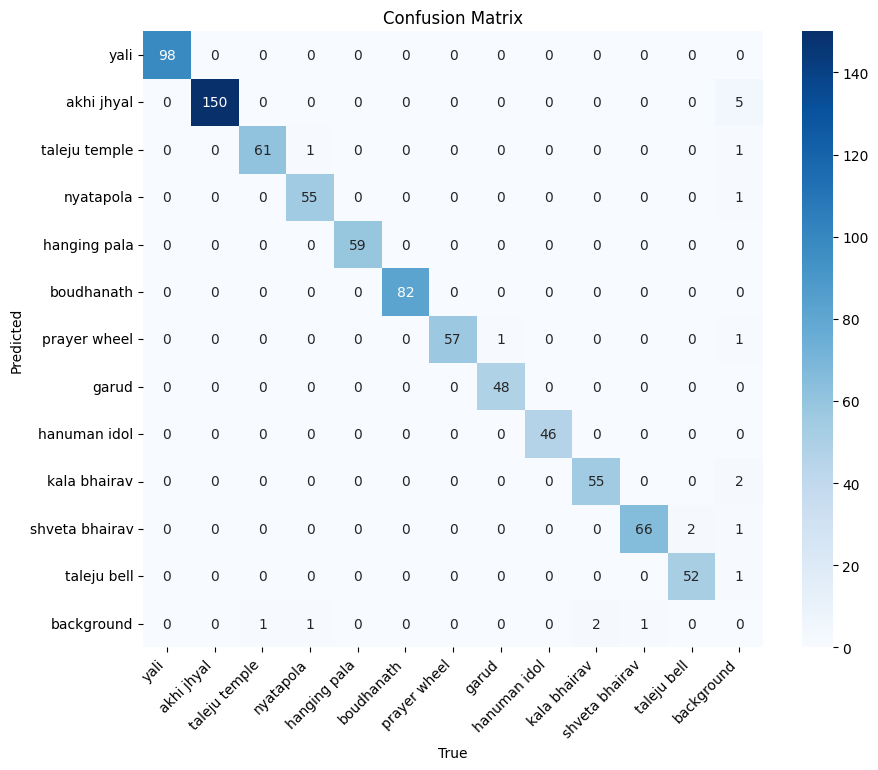

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the confusion matrix data
data = np.array([
    [98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 150, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
    [0, 0, 61, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 55, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 59, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 57, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 46, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 0, 0, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 2, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 1],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0]
])

labels = ['yali', 'akhi jhyal', 'taleju temple', 'nyatapola', 'hanging pala', 'boudhanath',
          'prayer wheel', 'garud', 'hanuman idol', 'kala bhairav', 'shveta bhairav', 'taleju bell', 'background']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="Blues") # Removed xtickslabels and yticklabels

plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')

# Set tick labels using plt.xticks() and plt.yticks()
plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=45, ha='right') # Set x-axis labels
plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels, rotation=0) # Set y-axis labels

plt.show()